Choosen DB ist the IMDb

Questions on the movie Database:

- Which movies have the most provit the last five years (from 2011-2015?
- Which movie has the the highest profit over all years?
- Which director produces the best profit over all years?
- Which genres has the most profit?
- Does the genres with a high popularity also have a high profit?


In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

Cleaning up the database.
- Cleanup Not relevant Columns (imdb_id, homepage, tagline, keywords, overview)
- Search for duplicates and remove them

Drop unused Columns

In [4]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


Check for duplicates on ID, because database ID only once exists

In [6]:
df.id.duplicated().sum()

1

Drop duplicates on ID

In [7]:
df.drop_duplicates(inplace = True)

Create a new Column "profit" which is showing the difference between renue_adj and budget_adj.

Calculate Profit

In [8]:
df['profit'] = df.revenue_adj - df.budget_adj

Convert Profit from Float to Int -> better to read

In [9]:
df['profit'] = df['profit'].astype(np.int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
profit                  10865 non-null int64
dtypes: float64(4), int64(7), object(6)
memory usage: 1.5+ MB


In [11]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1254445953
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,210161353
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,170419069
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1718723210
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1210948878


In [12]:
#Write cleanup db to csv
df.to_csv('cleanedupIMDB.csv', index=False)

Questionaire

Which movies has the highest provit the last five years?

In [13]:
#Read cleanedup db
cleanedUpDF = pd.read_csv('cleanedupIMDB.csv')

In [14]:
mostProfitMY = cleanedUpDF.sort_values(by='release_year', ascending=False).groupby(['release_year'], sort=False)['original_title', 'director', 'genres','profit'].apply(lambda x: (x.groupby(['genres', 'original_title', 'director'])
                                      .sum()
                                      .sort_values('profit', ascending=False))
                                      .head(1))

In [15]:
mostProfitMY.head(5)

,,,,profit
release_year,genres,original_title,director,
2015,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,J.J. Abrams,1718723210
2014,Adventure|Fantasy,The Hobbit: The Battle of the Five Armies,Peter Jackson,649479526
2013,Animation|Adventure|Family,Frozen,Chris Buck|Jennifer Lee,1052306488
2012,Science Fiction|Action|Adventure,The Avengers,Joss Whedon,1234247693
2011,Adventure|Family|Fantasy,Harry Potter and the Deathly Hallows: Part 2,David Yates,1166009242


Finding: We can see the most profit movies from the last 5 years from 2011-2015

Which movie has the the highest profit over all years?

In [16]:
highestMovieProfit = cleanedUpDF.groupby('original_title')['original_title', 'profit'].sum().sort_values('profit', ascending=False)

In [17]:
highestMovieProfit.head(1)

,profit
original_title,
Star Wars,2750136650


Finding: The Movie with the highest profit until 2015 is Star Wars.

Which director produces the best profit?

In [18]:
directorMostProfit =  cleanedUpDF.groupby('director')['director', 'profit'].sum().sort_values('profit', ascending=False)

In [19]:
directorMostProfit.head(5)

,profit
director,
Steven Spielberg,13050676829
James Cameron,6296228734
George Lucas,5844159204
Peter Jackson,5644123110
Chris Columbus,4353342721


Finding: Looking at the top 5 director, the one with the highest profit over all years is Steven Spielberg

Split genres 

In [20]:
#Reading cleanedupIMDB for modifying 
genresDF = pd.read_csv('cleanedupIMDB.csv')

In [21]:
#Splitting the genres String to get a list for explode function
genresDF.genres = df.genres.str.split("|")
#Generating for each genre one row with explode function for lists
genresDF = genresDF.explode('genres')

In [22]:
#Checking genres explode
genresDF.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1254445953
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1254445953
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1254445953
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1254445953
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,210161353


Which genre has the most provit over all years?

In [23]:
genresOverAllProfit = genresDF.groupby('genres')['genres', 'profit'].sum().sort_values('profit', ascending=False)

In [24]:
genresOverAllProfit.head(10)

,profit
genres,
Drama,131376105573
Action,127326411070
Comedy,116212507503
Adventure,111643894672
Thriller,99532362156
Science Fiction,68704059268
Fantasy,63567934856
Family,60995769096
Crime,53319554349


Finding: Over all years movies in the genre Drama has the highest profit.

Does the genres with a high popularity also have a high profit?

In [25]:
genresProfitPop = genresDF.groupby('genres')['popularity', 'profit'].sum().sort_values('popularity', ascending=False)

In [26]:
genresProfitPop

,popularity,profit
genres,,
Drama,2804.342252,131376105573
Comedy,2267.638726,116212507503
Action,2161.127683,127326411070
Thriller,2122.470511,99532362156
Adventure,1647.873464,111643894672
Science Fiction,1204.460960,68704059268
Romance,1023.985354,49905937646
Crime,998.404882,53319554349
Family,945.315994,60995769096


Finding: Taking a look at the result table let asume that a genre with a high popularity also have a high profit.
But taking a closer look to the scatter plot it is more clear showing the trend between popularity and profit.

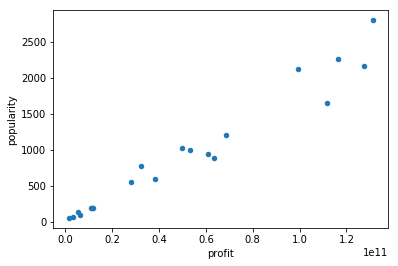

In [27]:
genresProfitPop.plot(x='profit', y='popularity', kind="scatter");